# Calculate the radiative forcing of Southern Ocean clouds and an estimated temperature response 

In this notebook we take the mean CERES EBAF top of atmosphere radiation from 2000 to 2023 and replace all values between -90$^\circ$S and -45$^\circ$S with the clear sky radiation product. This effectivly removes clouds from this region, leaving in the radiation that is reflected/emitted from the surface/atmosphere. 

After this, we then want to understand what contribution these SO clouds have on the radiative forcing: 

$\Delta$RF = (SW_no_SO_clouds - SW_observed) + (LW_no_SO_clouds - LW_observed)

Now that we have an estimate of how important Southern Ocean clouds are to the global energy budget, we perform a back of the envelop estimate of the resulting temperature response after rapid adjustments: 

$\Delta$T = $\Delta$RF / $\alpha$ 

$\alpha$ is the sum of climate feedback parameters, which include the Plank response, water vapour feedback, cloud feedbacks, albedo and others . The IPCC AR6 (Forster et al. 2021) estimates the net $\alpha$ under a doubling of CO$_2$ (data from Zelinka et al. (2023)) as: 

$\alpha$ = 1.1 W m$^{-2}$ K$^{-1}$  

The feedback parameters have been estimated as a function of doubling the Earth's CO$_2$, which is then allowed to reach equilibrium. We have not performed an experiment where the Earth is allowed to equlibrate after removing the SO clouds, so these results are indicitive only. We can also consider just the instantaneous temperature respose: $\Delta$T$_{instant}$ by breaking down $\alpha$ into it's compenets and considering only the Plank response. 

$\Delta$T$_{instant}$ = $\Delta$RF / $\alpha_{Plank}$ 

$\alpha_{Plank}$  = -3.2 W m$^{-2}$ K$^{-1}$


### References 
* Zelinka, M., 2023, Chapter 7 of the Working Group I Contribution to the IPCC Sixth Assessment Report - Input data for Figure 7.10 (v20220721), NERC EDS Centre for Environmental Data Analysis, https://dx.doi.org/10.5285/80380cfc0b10478b8b5821c0facdbdda

* Forster, P., T. Storelvmo, K. Armour, W. Collins, J.-L. Dufresne, D. Frame, D.J. Lunt, T. Mauritsen, M.D. Palmer, M. Watanabe, M. Wild, and H. Zhang, 2021: The Earth’s Energy Budget, Climate Feedbacks, and Climate Sensitivity. In Climate Change 2021: The Physical Science Basis. Contribution of Working Group I to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change [Masson-Delmotte, V., P. Zhai, A. Pirani, S.L. Connors, C. Péan, S. Berger, N. Caud, Y. Chen, L. Goldfarb, M.I. Gomis, M. Huang, K. Leitzell, E. Lonnoy, J.B.R. Matthews, T.K. Maycock, T. Waterfield, O. Yelekçi, R. Yu, and B. Zhou (eds.)]. Cambridge University Press, Cambridge, United Kingdom and New York, NY, USA, pp. 923–1054, https://dx.doi.org10.1017/9781009157896.009.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr


In [2]:
rsut = xr.open_mfdataset('/g/data/qv56/replicas/obs4MIPs/NASA-LaRC/CERES-EBAF-4-2/mon/rsut/gn/v20240513/rsut_mon_CERES-EBAF-4-2_RSS_gn_200003-202310.nc')
rsutcs = xr.open_mfdataset('/g/data/qv56/replicas/obs4MIPs/NASA-LaRC/CERES-EBAF-4-2/mon/rsutcs/gn/v20240513/rsutcs_mon_CERES-EBAF-4-2_RSS_gn_200003-202310.nc')

rlut = xr.open_mfdataset('/g/data/qv56/replicas/obs4MIPs/NASA-LaRC/CERES-EBAF-4-2/mon/rlut/gn/v20240513/rlut_mon_CERES-EBAF-4-2_RSS_gn_200003-202310.nc')
rlutcs = xr.open_mfdataset('/g/data/qv56/replicas/obs4MIPs/NASA-LaRC/CERES-EBAF-4-2/mon/rlutcs/gn/v20240513/rlutcs_mon_CERES-EBAF-4-2_RSS_gn_200003-202310.nc')

rsut = rsut['rsut']
rsutcs = rsutcs['rsutcs']
rlut = rlut['rlut']
rlutcs = rlutcs['rlutcs']

In [3]:
rsut_no_SO = rsut.copy()
rlut_no_SO = rlut.copy()

# Define the Southern Ocean band: -90 <= lat < -40
southern_band = (rsut['lat'] >= -90) & (rsut['lat'] < -45)

# Replace SO with the clear sky = so we still get the surface albedo, but not the clouds. 
rsut_no_SO = xr.where(southern_band, rsutcs, rsut_no_SO)
rlut_no_SO = xr.where(southern_band, rlutcs, rlut_no_SO)

In [30]:
# Calculate change in SW radiation due to no clouds. 
dSW = rsut_no_SO - rsut
dSW_mean = dSW.mean()
print('SW component:', dSW.mean().values.round(2))

dLW = rlut_no_SO - rlut
dLW_mean = dLW.mean()
print('LW component:', dLW.mean().values.round(2))

# Total RF 
dRF = dSW_mean.values + dLW_mean.values
print('Total dRF:', dRF.round(2))

SW component: -8.75
LW component: 4.45
Total dRF: -4.3


In [29]:
# Calculate temperature estimate using a simple back of envelope estimation: 
alpha = -1.1
alpha_plank = -3.2
dT = dRF/alpha
dT_instant = dRF/alpha_plank
print('Temperature response after rapid ajdustments: ',dT.round(2))
print('Instant temperature response: ',dT_instant.round(2))


Temperature response after rapid ajdustments:  3.91
Instant temperature response:  1.34


/g/data/xp65/public/apps/med_conda/envs/analysis3-26.01/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:379: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/g/data/xp65/public/apps/med_conda/envs/analysis3-26.01/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:379: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


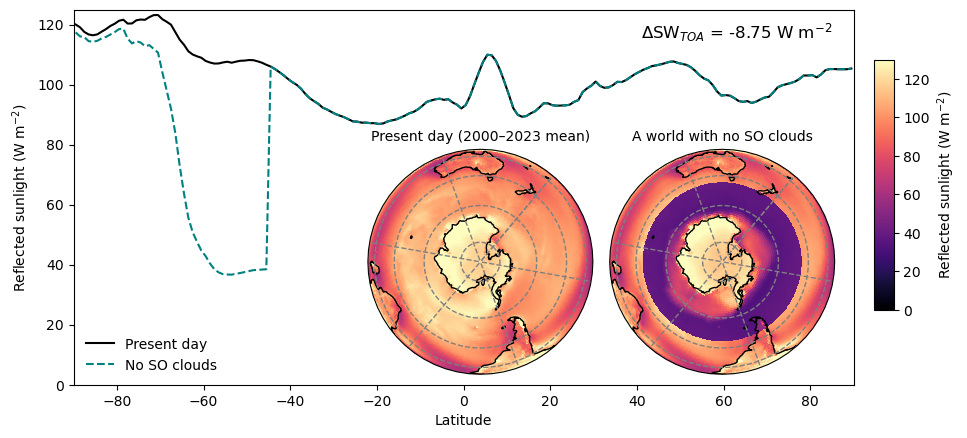

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.geoaxes import GeoAxes  # critical for cartopy insets

# --- Figure and main line axis (wide and short) ---
fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(
    nrows=1, ncols=1,
    left=0.08, right=0.86, bottom=0.2, top=0.95
)
ax_line = fig.add_subplot(gs[0])

# --- Line plot ---
rsut.mean(['time', 'lon']).plot(ax=ax_line, color='black', label='Present day')
rsut_no_SO.mean(['time', 'lon']).plot(ax=ax_line, color='teal', linestyle='--', label='No SO clouds')
plt.ylim(0,125)
plt.xlim(-90,90)
ax_line.set_ylabel('Reflected sunlight (W m$^{-2}$)')
ax_line.set_xlabel('Latitude')
ax_line.legend(loc='lower left', frameon=False)
plt.title('$\Delta$SW$_{TOA}$ = '+str(dSW_mean.values.round(2))+' W m$^{-2}$',x=0.85,y=0.9)

# --- Map insets side-by-side in lower-right ---
projection = ccrs.Orthographic(140, -90)

# Make them a bit larger and closer than before
inset_w = "33%"   # wider
inset_h = "60%"   # taller

# LEFT inset: Present day (CURRENT WORLD FIRST)
ax_inset_left = inset_axes(
    ax_line,
    width=inset_w, height=inset_h,
    loc='lower right',
    borderpad=0.75,
    bbox_to_anchor=(-0.3, 0.0, 1.0, 1.0),  # shift left slightly (closer to the right inset)
    bbox_transform=ax_line.transAxes,
    axes_class=GeoAxes,
    axes_kwargs={'map_projection': projection}
)
p = rsut.mean('time').plot(
    cmap='magma',
    transform=ccrs.PlateCarree(),
    ax=ax_inset_left,
    vmin=0, vmax=130,
    add_colorbar=False, label=' '
)
gl = ax_inset_left.gridlines(transform=ccrs.PlateCarree(),
                  linewidth=1, color='gray', alpha=1, linestyle='--',draw_labels=False)
ax_inset_left.coastlines(color='black')
ax_inset_left.set_title('Present day (2000–2023 mean)', fontsize=10)
ax_inset_left.set_facecolor('none')

# RIGHT inset: No SO clouds (placed at the lower-right anchor)
ax_inset_right = inset_axes(
    ax_line,
    width=inset_w, height=inset_h,
    loc='lower right',
    borderpad=0.75,
    bbox_to_anchor=(0.01, 0.0, 1.0, 1.0),  # shift left slightly (closer to the right inset)
    bbox_transform=ax_line.transAxes,
    axes_class=GeoAxes,
    axes_kwargs={'map_projection': projection}
)
rsut_no_SO.mean('time').plot(
    cmap='magma',
    transform=ccrs.PlateCarree(),
    ax=ax_inset_right,
    vmin=0, vmax=130,
    add_colorbar=False, label=' '
)
gl = ax_inset_right.gridlines(transform=ccrs.PlateCarree(),
                  linewidth=1, color='gray', alpha=1, linestyle='--',draw_labels=False)
ax_inset_right.coastlines(color='black')
ax_inset_right.set_title('A world with no SO clouds', fontsize=10)
ax_inset_right.set_facecolor('none')

# --- Shared colorbar on far right (using 'p' from first inset) ---
cax = fig.add_axes([0.88, 0.35, 0.02, 0.5])
cb = plt.colorbar(p, cax=cax, orientation='vertical',
                  label='Reflected sunlight (W m$^{-2}$)')

plt.show()

/g/data/xp65/public/apps/med_conda/envs/analysis3-26.01/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:379: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/g/data/xp65/public/apps/med_conda/envs/analysis3-26.01/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:379: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


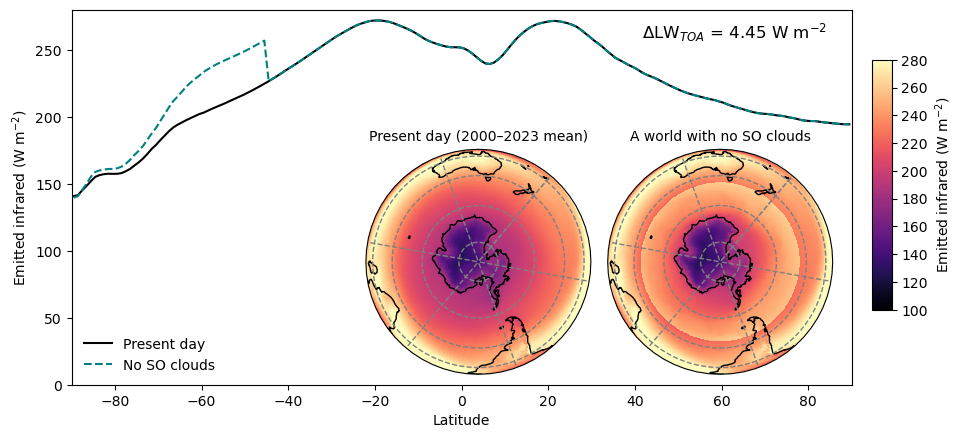

In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.geoaxes import GeoAxes  # critical for cartopy insets

# --- Figure and main line axis (wide and short) ---
fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(
    nrows=1, ncols=1,
    left=0.08, right=0.86, bottom=0.2, top=0.95
)
ax_line = fig.add_subplot(gs[0])

# --- Line plot ---
rlut.mean(['time', 'lon']).plot(ax=ax_line, color='black', label='Present day')
rlut_no_SO.mean(['time', 'lon']).plot(ax=ax_line, color='teal', linestyle='--', label='No SO clouds')
plt.ylim(0,280)
plt.xlim(-90,90)
ax_line.set_ylabel('Emitted infrared (W m$^{-2}$)')
ax_line.set_xlabel('Latitude')
ax_line.legend(loc='lower left', frameon=False)
plt.title('$\Delta$LW$_{TOA}$ = '+str(dLW_mean.values.round(2))+' W m$^{-2}$',x=0.85,y=0.9)

# --- Map insets side-by-side in lower-right ---
projection = ccrs.Orthographic(140, -90)

# Make them a bit larger and closer than before
inset_w = "33%"   # wider
inset_h = "60%"   # taller

# LEFT inset: Present day (CURRENT WORLD FIRST)
ax_inset_left = inset_axes(
    ax_line,
    width=inset_w, height=inset_h,
    loc='lower right',
    borderpad=0.75,
    bbox_to_anchor=(-0.3, 0.0, 1.0, 1.0),  # shift left slightly (closer to the right inset)
    bbox_transform=ax_line.transAxes,
    axes_class=GeoAxes,
    axes_kwargs={'map_projection': projection}
)
p = rlut.mean('time').plot(
    cmap='magma',
    transform=ccrs.PlateCarree(),
    ax=ax_inset_left,
    vmin=100, vmax=280,
    add_colorbar=False, label=' '
)
gl = ax_inset_left.gridlines(transform=ccrs.PlateCarree(),
                  linewidth=1, color='gray', alpha=1, linestyle='--',draw_labels=False)
ax_inset_left.coastlines(color='black')
ax_inset_left.set_title('Present day (2000–2023 mean)', fontsize=10)
ax_inset_left.set_facecolor('none')

# RIGHT inset: No SO clouds (placed at the lower-right anchor)
ax_inset_right = inset_axes(
    ax_line,
    width=inset_w, height=inset_h,
    loc='lower right',
    borderpad=0.75,
    bbox_to_anchor=(0.01, 0.0, 1.0, 1.0),  # shift left slightly (closer to the right inset)
    bbox_transform=ax_line.transAxes,
    axes_class=GeoAxes,
    axes_kwargs={'map_projection': projection}
)
rlut_no_SO.mean('time').plot(
    cmap='magma',
    transform=ccrs.PlateCarree(),
    ax=ax_inset_right,
    vmin=100, vmax=280,
    add_colorbar=False, label=' '
)
gl = ax_inset_right.gridlines(transform=ccrs.PlateCarree(),
                  linewidth=1, color='gray', alpha=1, linestyle='--',draw_labels=False)
ax_inset_right.coastlines(color='black')
ax_inset_right.set_title('A world with no SO clouds', fontsize=10)
ax_inset_right.set_facecolor('none')

# --- Shared colorbar on far right (using 'p' from first inset) ---
cax = fig.add_axes([0.88, 0.35, 0.02, 0.5])
cb = plt.colorbar(p, cax=cax, orientation='vertical',
                  label='Emitted infrared (W m$^{-2}$)')

plt.show()